In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import nltk
nltk.download('all')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[

In [5]:
# Loading the data

df = pd.read_csv('csv_order\ColdPlay.csv')
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\rajro\AppData\Local\Temp\ipykernel_21028\2762720348.py:3: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('csv_order\ColdPlay.csv')


,Artist,Title,Album,Date,Lyric,Year
0,Coldplay,The Scientist,A Rush of Blood to the Head,2002-08-26,come up to meet you tell you i'm sorry you don...,2002.0
1,Coldplay,Viva la Vida,Viva La Vida or Death and All His Friends,2008-05-25,chris martin i used to rule the world seas wou...,2008.0
2,Coldplay,Fix You,X&Y,2005-06-06,chris martin when you try your best but you do...,2005.0
3,Coldplay,Yellow,Parachutes,2000-06-26,chris martin look at the stars look how they s...,2000.0
4,Coldplay,Hymn for the Weekend,A Head Full of Dreams,2016-01-25,beyoncé and said drink from me drink from me o...,2016.0


**Data Cleaning**

In [7]:
# Removing irrelevant columns
df.drop(['Artist', 'Year', 'Date'], axis=1, inplace = True)
df.head()

,Title,Album,Lyric
0,The Scientist,A Rush of Blood to the Head,come up to meet you tell you i'm sorry you don...
1,Viva la Vida,Viva La Vida or Death and All His Friends,chris martin i used to rule the world seas wou...
2,Fix You,X&Y,chris martin when you try your best but you do...
3,Yellow,Parachutes,chris martin look at the stars look how they s...
4,Hymn for the Weekend,A Head Full of Dreams,beyoncé and said drink from me drink from me o...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   344 non-null    object
 1   Album   344 non-null    object
 2   Lyric   333 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


In [9]:
# Since there are NaN in Lyric column, casting the column type as string
# Then NaN will be removed later

df = df.astype({'Lyric':'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   344 non-null    object
 1   Album   344 non-null    object
 2   Lyric   344 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


In [10]:
df.shape

(344, 3)

In [11]:
# As can be seen in the df, there are artist names in the Lyric
# Listing the possible names mentioned here

name_list = [
    'coldplay', 'chris martin', 'guy berryman', 'phil harvey', 'jonny buckland', 'will champion', 
    'beyoncé', 'rihanna', 'jay z', 'avicii', 'u2', 'faultline', 'band aid', 'kanye west',
    'ian mcculloch', 'echo & the bunnymen', 'kylie minogue', 'alicia keys', 'richard ashcroft',
    'the streets', 'nelly furtado', 'ron sexsmith', 'the flaming lips', 'ed sheeran', 'ariana grande',
    'noel gallagher', 'gwyneth paltrow', 'bruno mars', 'kit harington', 'rose leslie', 'peter dinklage',
    'emilia clarke', 'nikolaj coster-waldau', 'iwan rheon', 'alfie allen', 'john bradley', 'mark addy',
    'thomas brodie-sangster', 'liam cunningham', 'gwendoline christie', 'charlotte hope', 'narrator'
]
names = '|'.join(name_list)

df[df['Lyric'].str.contains(names)]

,Title,Album,Lyric
1,Viva la Vida,Viva La Vida or Death and All His Friends,chris martin i used to rule the world seas wou...
2,Fix You,X&Y,chris martin when you try your best but you do...
3,Yellow,Parachutes,chris martin look at the stars look how they s...
4,Hymn for the Weekend,A Head Full of Dreams,beyoncé and said drink from me drink from me o...
8,Orphans,Everyday Life,chris martin choir moses martin i want to kno...
15,Up&Up,A Head Full of Dreams,chris martin fixing up a car driving it again ...
17,Arabesque,Everyday Life,chris martin i could be you you could be me tw...
21,Champion of the World,Everyday Life,'otuto nke chukwu' gi nwa nke chukwu gini ka i...
30,Trouble in Town,Everyday Life,chris martin trouble in town because they cut ...
35,Don’t Panic,Parachutes,chris martin bones sinking like stones all tha...


In [12]:
# Function to clean lyrics

def cleaning_lyrics(lyric):
    if lyric != "nan":
        for name in name_list:
            lyric = lyric.replace(name, '').strip()
            lyric = lyric.lower()
    else:
        lyric = lyric.replace("nan", '').strip()
    return lyric

# Apply the function to the 'Lyric' column

df['Cleaned Lyric'] = df['Lyric'].apply(cleaning_lyrics)
df

,Title,Album,Lyric,Cleaned Lyric
0,The Scientist,A Rush of Blood to the Head,come up to meet you tell you i'm sorry you don...,come up to meet you tell you i'm sorry you don...
1,Viva la Vida,Viva La Vida or Death and All His Friends,chris martin i used to rule the world seas wou...,i used to rule the world seas would rise when ...
2,Fix You,X&Y,chris martin when you try your best but you do...,when you try your best but you don't succeed w...
3,Yellow,Parachutes,chris martin look at the stars look how they s...,look at the stars look how they shine for you ...
4,Hymn for the Weekend,A Head Full of Dreams,beyoncé and said drink from me drink from me o...,and said drink from me drink from me ohahohah ...
...,...,...,...,...
339,Trouble (Live @ Rockefeller Music Hall),Trouble ‒ Norwegian Live EP,oh no i see a spider web is tangled up with me...,oh no i see a spider web is tangled up with me...
340,Don’t Panic (Live at KCRW),Live at KCRW’s “Morning Becomes Eclectic”,bones sinking like stones all that we've fough...,bones sinking like stones all that we've fough...
341,Everything’s Not Lost (Live @ Rockefeller Musi...,Trouble ‒ Norwegian Live EP,when i counted up my demons saw there was one ...,when i counted up my demons saw there was one ...
342,Family Portrait,Shock Value 2,nan,


In [13]:
# Generating Wordcloud

STOPWORDS = STOPWORDS

wc = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        height=2000,
        width=2000,
        max_words=200, 
        min_font_size=10, 
        relative_scaling=0.5
)

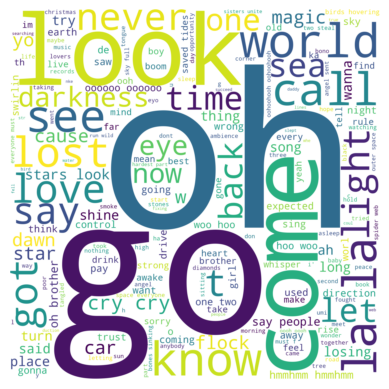

In [14]:
wc.generate(df['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Text Analysis using TextBlob**

In [15]:
# Removing stopwords and tokenizing cleaned lyrics for sentiment analysis

def tokenizing(lyrics):
    tokens = word_tokenize(lyrics)
    filtered_tokens = []
    for token in tokens:
        if token not in stopwords.words('english'):
            filtered_tokens.append(token)
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

df['Tokenized Lyric'] = df['Cleaned Lyric'].apply(tokenizing)
df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric
0,The Scientist,A Rush of Blood to the Head,come up to meet you tell you i'm sorry you don...,come up to meet you tell you i'm sorry you don...,come meet tell 'm sorry n't know lovely find t...
1,Viva la Vida,Viva La Vida or Death and All His Friends,chris martin i used to rule the world seas wou...,i used to rule the world seas would rise when ...,used rule world seas would rise gave word morn...
2,Fix You,X&Y,chris martin when you try your best but you do...,when you try your best but you don't succeed w...,try best n't succeed get want need feel tired ...
3,Yellow,Parachutes,chris martin look at the stars look how they s...,look at the stars look how they shine for you ...,look stars look shine everything yeah yellow c...
4,Hymn for the Weekend,A Head Full of Dreams,beyoncé and said drink from me drink from me o...,and said drink from me drink from me ohahohah ...,said drink drink ohahohah shoot across sky sym...
...,...,...,...,...,...
339,Trouble (Live @ Rockefeller Music Hall),Trouble ‒ Norwegian Live EP,oh no i see a spider web is tangled up with me...,oh no i see a spider web is tangled up with me...,oh see spider web tangled lost head thought st...
340,Don’t Panic (Live at KCRW),Live at KCRW’s “Morning Becomes Eclectic”,bones sinking like stones all that we've fough...,bones sinking like stones all that we've fough...,bones sinking like stones 've fought homes pla...
341,Everything’s Not Lost (Live @ Rockefeller Musi...,Trouble ‒ Norwegian Live EP,when i counted up my demons saw there was one ...,when i counted up my demons saw there was one ...,counted demons saw one every day good ones sho...
342,Family Portrait,Shock Value 2,nan,,


In [16]:
# Sentiment analysis using VADER

sia = SentimentIntensityAnalyzer()

In [17]:
def sentiment(tokenized):
    sentiment_score = sia.polarity_scores(tokenized)
    
    return sentiment_score

df['Sentiment Score'] = df['Tokenized Lyric'].apply(sentiment)

df[['Neg', 'Neu', 'Pos', 'Compound']] = df['Sentiment Score'].apply(pd.Series)

df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric,Sentiment Score,Neg,Neu,Pos,Compound
0,The Scientist,A Rush of Blood to the Head,come up to meet you tell you i'm sorry you don...,come up to meet you tell you i'm sorry you don...,come meet tell 'm sorry n't know lovely find t...,"{'neg': 0.127, 'neu': 0.726, 'pos': 0.147, 'co...",0.127,0.726,0.147,0.6734
1,Viva la Vida,Viva La Vida or Death and All His Friends,chris martin i used to rule the world seas wou...,i used to rule the world seas would rise when ...,used rule world seas would rise gave word morn...,"{'neg': 0.097, 'neu': 0.868, 'pos': 0.036, 'co...",0.097,0.868,0.036,-0.9425
2,Fix You,X&Y,chris martin when you try your best but you do...,when you try your best but you don't succeed w...,try best n't succeed get want need feel tired ...,"{'neg': 0.335, 'neu': 0.593, 'pos': 0.072, 'co...",0.335,0.593,0.072,-0.9756
3,Yellow,Parachutes,chris martin look at the stars look how they s...,look at the stars look how they shine for you ...,look stars look shine everything yeah yellow c...,"{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'comp...",0.000,0.766,0.234,0.9766
4,Hymn for the Weekend,A Head Full of Dreams,beyoncé and said drink from me drink from me o...,and said drink from me drink from me ohahohah ...,said drink drink ohahohah shoot across sky sym...,"{'neg': 0.284, 'neu': 0.631, 'pos': 0.085, 'co...",0.284,0.631,0.085,-0.9886
...,...,...,...,...,...,...,...,...,...,...
339,Trouble (Live @ Rockefeller Music Hall),Trouble ‒ Norwegian Live EP,oh no i see a spider web is tangled up with me...,oh no i see a spider web is tangled up with me...,oh see spider web tangled lost head thought st...,"{'neg': 0.137, 'neu': 0.648, 'pos': 0.214, 'co...",0.137,0.648,0.214,0.7279
340,Don’t Panic (Live at KCRW),Live at KCRW’s “Morning Becomes Eclectic”,bones sinking like stones all that we've fough...,bones sinking like stones all that we've fough...,bones sinking like stones 've fought homes pla...,"{'neg': 0.052, 'neu': 0.482, 'pos': 0.466, 'co...",0.052,0.482,0.466,0.9882
341,Everything’s Not Lost (Live @ Rockefeller Musi...,Trouble ‒ Norwegian Live EP,when i counted up my demons saw there was one ...,when i counted up my demons saw there was one ...,counted demons saw one every day good ones sho...,"{'neg': 0.179, 'neu': 0.515, 'pos': 0.306, 'co...",0.179,0.515,0.306,0.9729
342,Family Portrait,Shock Value 2,nan,,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000


In [18]:
# Categorize the sentiment as Positive, Neutral, and Negative

def categorize(x):
    if x > 0:
        return "Positive"
    if x < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Compound'].apply(categorize)
df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric,Sentiment Score,Neg,Neu,Pos,Compound,Sentiment
0,The Scientist,A Rush of Blood to the Head,come up to meet you tell you i'm sorry you don...,come up to meet you tell you i'm sorry you don...,come meet tell 'm sorry n't know lovely find t...,"{'neg': 0.127, 'neu': 0.726, 'pos': 0.147, 'co...",0.127,0.726,0.147,0.6734,Positive
1,Viva la Vida,Viva La Vida or Death and All His Friends,chris martin i used to rule the world seas wou...,i used to rule the world seas would rise when ...,used rule world seas would rise gave word morn...,"{'neg': 0.097, 'neu': 0.868, 'pos': 0.036, 'co...",0.097,0.868,0.036,-0.9425,Negative
2,Fix You,X&Y,chris martin when you try your best but you do...,when you try your best but you don't succeed w...,try best n't succeed get want need feel tired ...,"{'neg': 0.335, 'neu': 0.593, 'pos': 0.072, 'co...",0.335,0.593,0.072,-0.9756,Negative
3,Yellow,Parachutes,chris martin look at the stars look how they s...,look at the stars look how they shine for you ...,look stars look shine everything yeah yellow c...,"{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'comp...",0.000,0.766,0.234,0.9766,Positive
4,Hymn for the Weekend,A Head Full of Dreams,beyoncé and said drink from me drink from me o...,and said drink from me drink from me ohahohah ...,said drink drink ohahohah shoot across sky sym...,"{'neg': 0.284, 'neu': 0.631, 'pos': 0.085, 'co...",0.284,0.631,0.085,-0.9886,Negative
...,...,...,...,...,...,...,...,...,...,...,...
339,Trouble (Live @ Rockefeller Music Hall),Trouble ‒ Norwegian Live EP,oh no i see a spider web is tangled up with me...,oh no i see a spider web is tangled up with me...,oh see spider web tangled lost head thought st...,"{'neg': 0.137, 'neu': 0.648, 'pos': 0.214, 'co...",0.137,0.648,0.214,0.7279,Positive
340,Don’t Panic (Live at KCRW),Live at KCRW’s “Morning Becomes Eclectic”,bones sinking like stones all that we've fough...,bones sinking like stones all that we've fough...,bones sinking like stones 've fought homes pla...,"{'neg': 0.052, 'neu': 0.482, 'pos': 0.466, 'co...",0.052,0.482,0.466,0.9882,Positive
341,Everything’s Not Lost (Live @ Rockefeller Musi...,Trouble ‒ Norwegian Live EP,when i counted up my demons saw there was one ...,when i counted up my demons saw there was one ...,counted demons saw one every day good ones sho...,"{'neg': 0.179, 'neu': 0.515, 'pos': 0.306, 'co...",0.179,0.515,0.306,0.9729,Positive
342,Family Portrait,Shock Value 2,nan,,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000,Neutral


**Visualizing the Sentiment**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

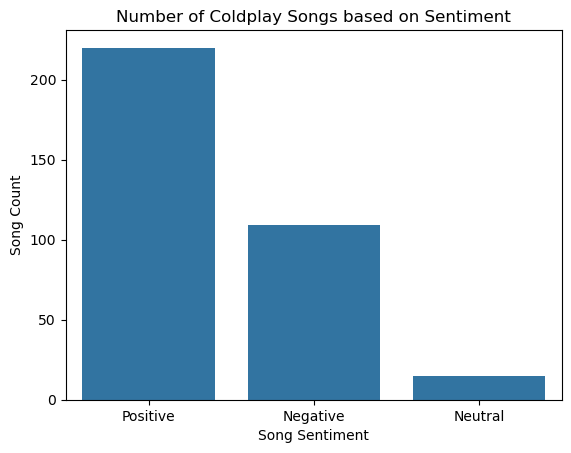

In [20]:
sns.countplot(x=df['Sentiment'], data=df).set(title='Number of Coldplay Songs based on Sentiment')
plt.xlabel('Song Sentiment')
plt.ylabel('Song Count')
plt.show()

**How's the sentiment in each album?**

In [21]:
album_sentiment = df.groupby('Album')['Compound'].mean().reset_index().sort_values(by='Compound', ascending = False).reset_index(drop=True)
album_sentiment.head()

,Album,Compound
0,Hakuna Matoma,0.9988
1,Live in Madrid,0.9959
2,Safety [EP],0.9937
3,Revamp: The Songs of Elton John & Bernie Taupin,0.9910
4,Adventure of a Lifetime - Audien Remix,0.9904


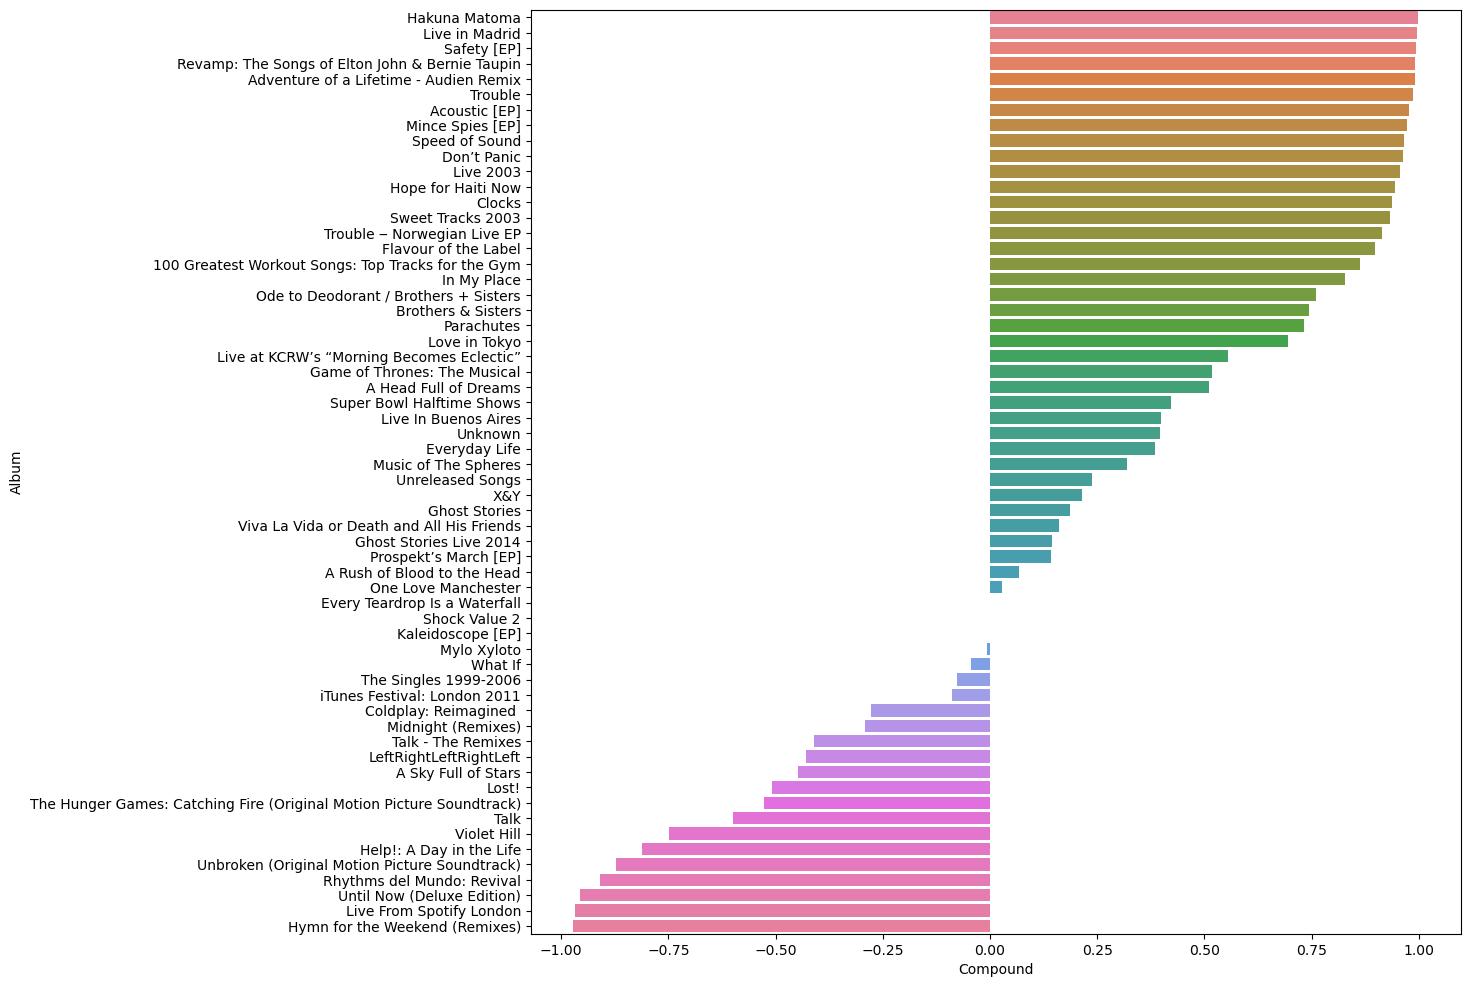

In [27]:
plt.figure(figsize =(12,12))
sns.barplot(x='Compound', y='Album', data = album_sentiment, hue='Album')
plt.show()

**Which songs has the most positive and most negative sentiment?**

In [23]:
pos_song = df[df['Compound'] == df['Compound'].max()]
neg_song = df[df['Compound'] == df['Compound'].min()]

print(f"The most positive song is {pos_song['Title'].to_string(index=False)} with a sentiment value of {pos_song['Compound'].to_string(index=False)}")
print(f"The most negative song is {neg_song['Title'].to_string(index=False)} with a sentiment value of {neg_song['Compound'].to_string(index=False)} ")

The most positive song is Game of Thrones: The Musical with a sentiment value of 0.9996
The most negative song is Idiot with a sentiment value of -0.9982 


In [24]:
pd.set_option('display.max_colwidth', None)

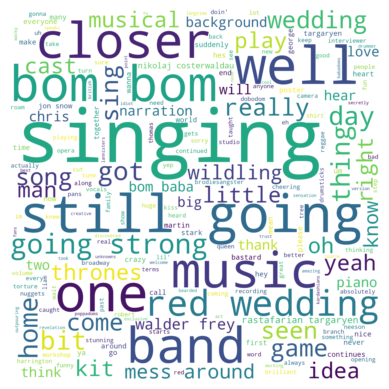

In [25]:
# Wordcloud of the most positive song

wc.generate(pos_song['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

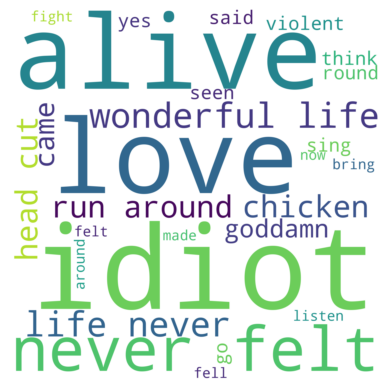

In [26]:
# Wordcloud of the most negative song

wc.generate(neg_song['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

From this analysis, here are some key takeaways:
1. The most common words in Coldplay songs are "love", "know", "come" and "see"
2. Majority of Coldplay songs has positive sentiment, which might be correlated to how their songs are perceived as happy and uplifting
3. "Hakuna Matoma" appears to be the most positive album and "Hymn for the Weekend (Remixes)" is the most negative one
3. The most positive song is "Game of Thrones: The Musical" and words like "singing", "music", "band", and "closer" are most spoken. 
4. On the other hand, "Idiot" is the most negative song in this database, which is manifested in the title itself. Words like "idiot", "never", "alive" and "love" are the most common one